In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

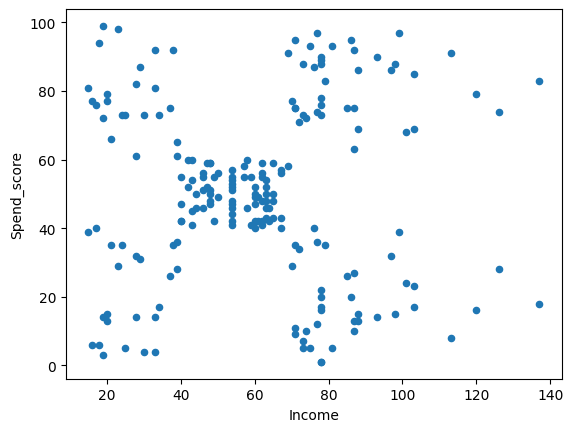

In [29]:
#Exercise 4.01 Data Staging and Visualization

#Load in data set
mall0 = pd.read_csv('https://raw.githubusercontent.com/johnson80245/python/refs/heads/main/csvs/DS%20for%20marketing%20analytics%20data/Chapter04/Datasets/Mall_Customers.csv')
mall0.head(4)

#Rename columns 
mall0.rename({'Annual Income (k$)' : 'Income',
            'Spending Score (1-100)' : 'Spend_score'},
            axis = 1, inplace = True)
mall0.head()

#plot scatter of income spend score
mall0.plot.scatter(x = 'Income', 
                   y = 'Spend_score')
plt.show()





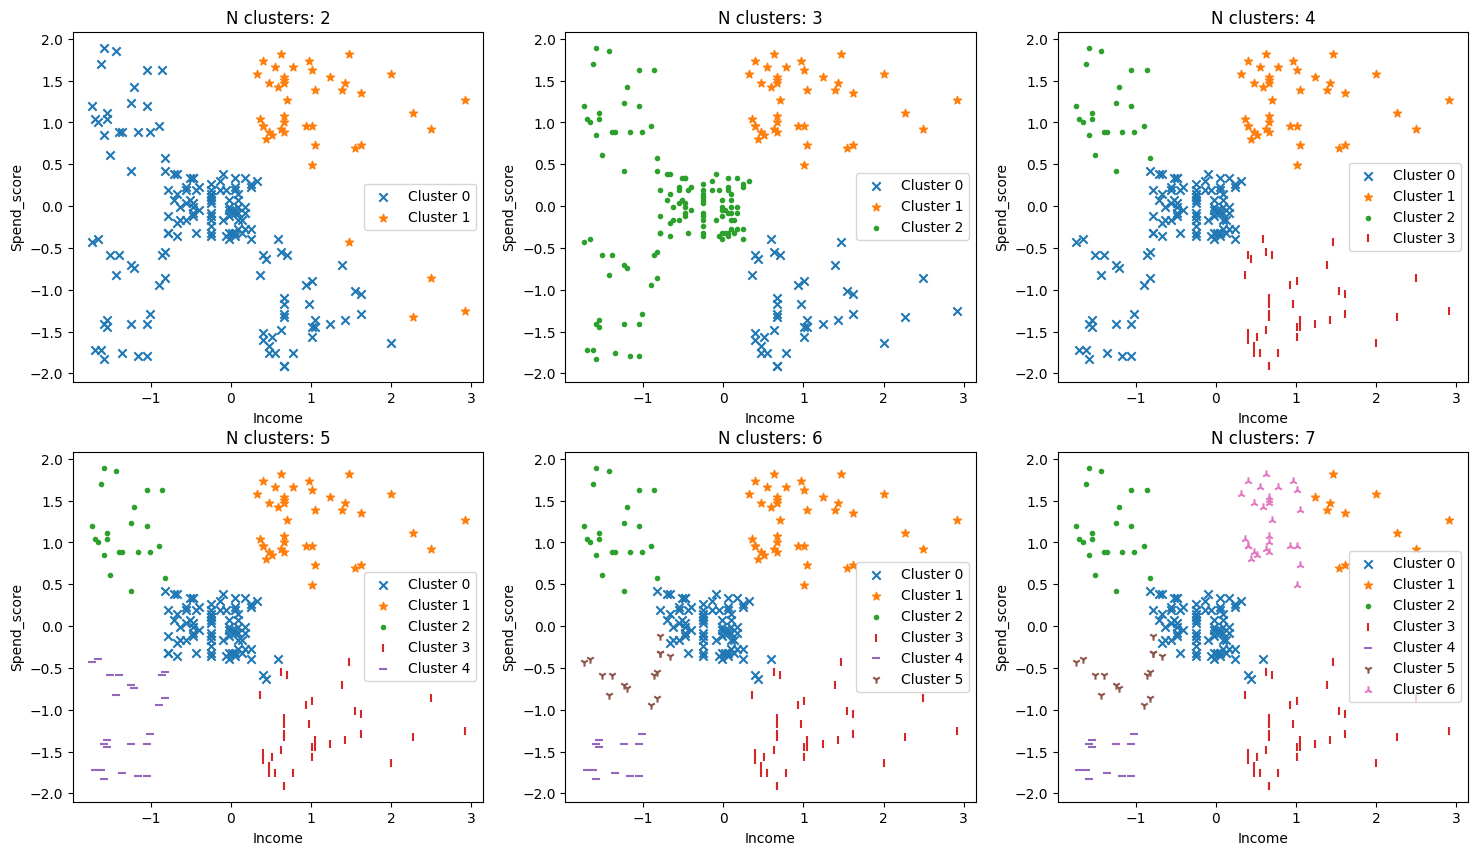

In [30]:
#Exercise 4.02 Choosing the number of clusters based on visual inspection

#Standardize the columns of age, income, spend_score
mall_scaled = mall0.copy()
cols_to_scale = ['Age', 'Income', 'Spend_score']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

mall_scaled[cols_to_scale] = scaler.fit_transform(mall_scaled[cols_to_scale])

#Import Kmeans and create cluster and markers 
from sklearn.cluster import KMeans

cluster_cols = ['Income', 'Spend_score']
markers = ['x', '*', '.', '|', '_', '1', '2']

#Create a for loop 
plt.figure(figsize=[18, 10])

for n in range(2, 8):
    model = KMeans(n_clusters = n,
                   random_state = 42)
    mall_scaled['Cluster'] = model.fit_predict(mall_scaled[cluster_cols])


    plt.subplot(2, 3, n-1)
    for clust in range(n):
        temp = mall_scaled[mall_scaled.Cluster == clust]
        plt.scatter(temp.Income, 
                    temp.Spend_score,
                    marker = markers[clust],
                    label = "Cluster " + str(clust))
        plt.title("N clusters: " + str(n))
        plt.xlabel('Income')
        plt.ylabel('Spend_score')
        plt.legend()

plt.show()

The inertia score is : 157.704


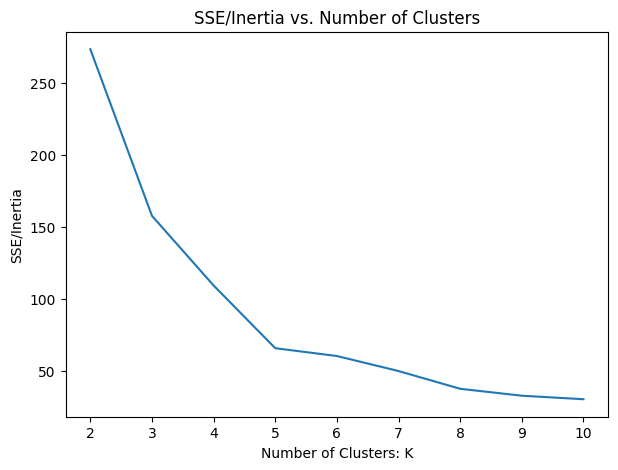

In [25]:
#Exercise 4.03 Determining the number of clusters using the elbow method 

#Create 3 clusers with income and spend score
K = 3
model = KMeans(n_clusters = K,
               random_state =  42)
model.fit(mall_scaled[cluster_cols])


#Print out teh inertia score
print("The inertia score is : {:}".format(round(model.inertia_,3)))

#Fit multiple KMeans models and store inertia values
X = mall_scaled[cluster_cols]

inertia_scores = []
for K in range(2,11):
    inertia = KMeans(n_clusters = K,
                     random_state = 42).fit(X).inertia_
    inertia_scores.append(inertia)

#Create the SSE/inertia_Scores
plt.figure(figsize = [7,5])
plt.plot(range(2,11), inertia_scores)
plt.title("SSE/Inertia vs. Number of Clusters")
plt.xlabel('Number of Clusters: K')
plt.ylabel('SSE/Inertia')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   income               1000 non-null   int64
 1   age                  1000 non-null   int64
 2   days_since_purchase  1000 non-null   int64
 3   annual_spend         1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


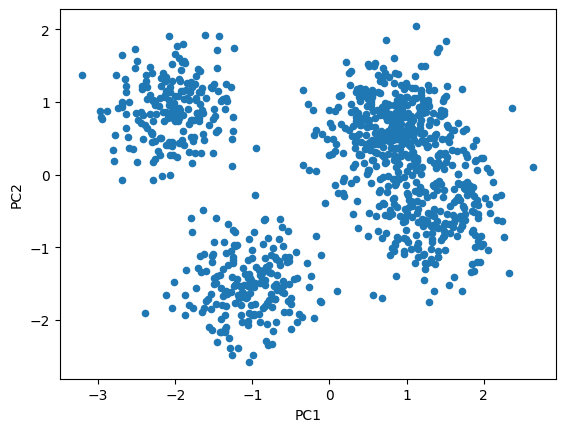

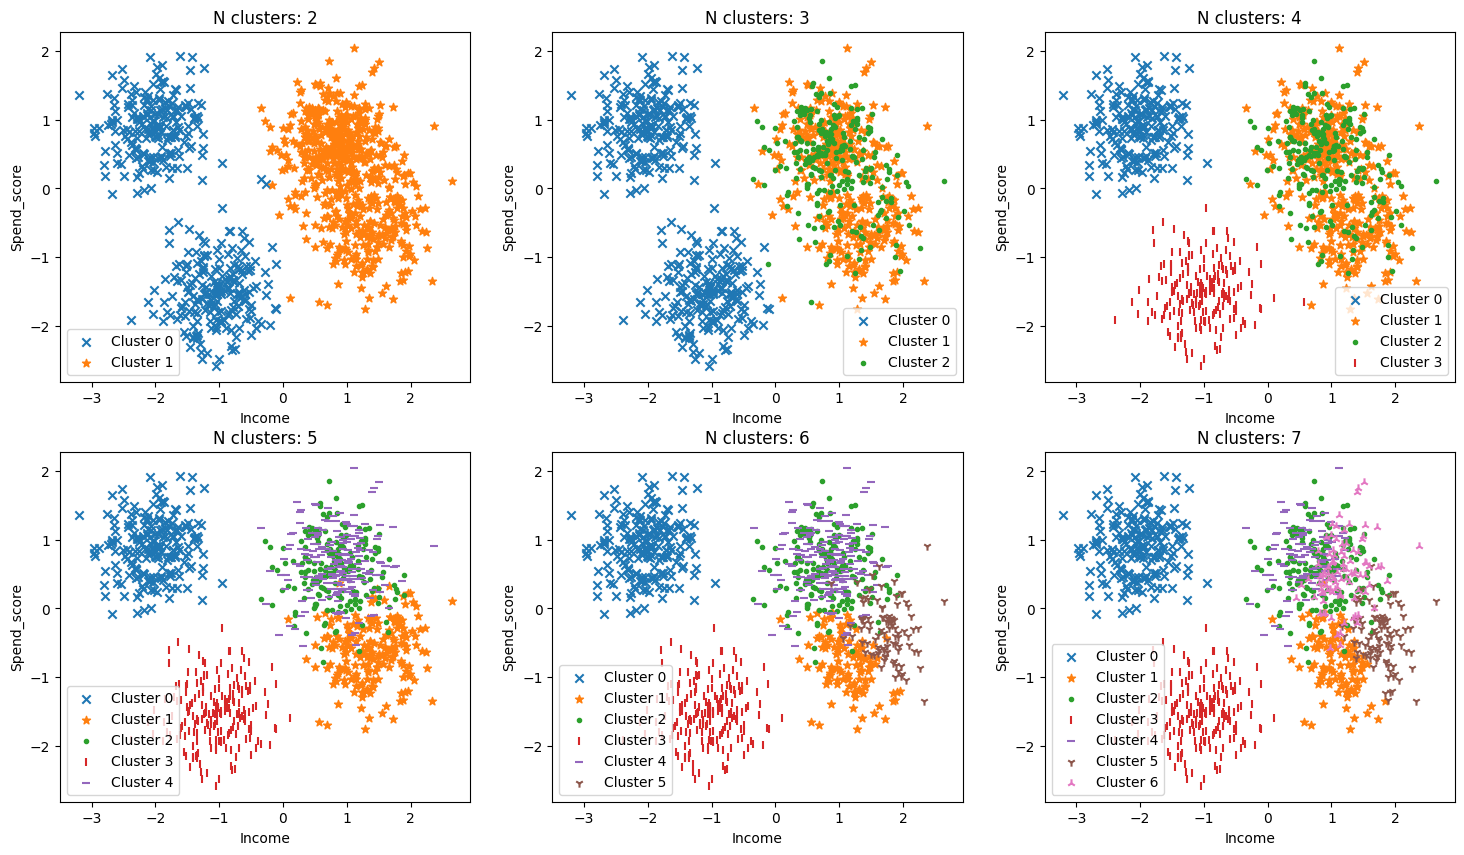

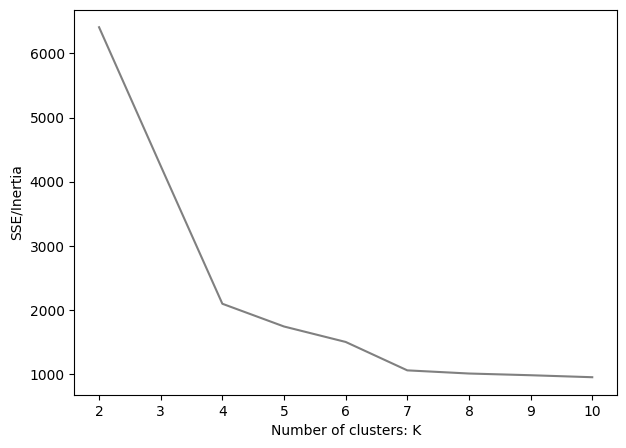

In [58]:
# Activity 4.01 Optimizing a Luxury Clothing Brands Marketing Campaing
#  using Clustering

clothing = pd.read_csv('https://raw.githubusercontent.com/johnson80245/python/refs/heads/main/csvs/DS%20for%20marketing%20analytics%20data/Chapter04/Datasets/Clothing_Customers.csv')
clothing.head()

#Check info
clothing.info()

#Look at the describe function
clothing.describe().T

#Cols to scale
columns_scaled = ['income', 'age', 'days_since_purchase', 'annual_spend']

#Scaling columns
clothing[columns_scaled] =  scaler.fit_transform(clothing[columns_scaled])
clothing.head()

#Perform PCA 
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(clothing[columns_scaled])

clothing['PC1'] = pca_res[:,0]
clothing['PC2'] = pca_res[:,1]

markers = ['|','2','_']

clothing.plot.scatter(x = 'PC1',
                      y = 'PC2')
plt.show()


#Create a cluster visual 2 - 7


markers = ['x', '*', '.', '|', '_', '1', '2']

#Create a for loop 
plt.figure(figsize=[18, 10])

for n in range(2, 8):
    model = KMeans(n_clusters = n,
                   random_state = 42)
    clothing['Cluster'] = model.fit_predict(clothing[columns_scaled])


    plt.subplot(2, 3, n-1)
    for clust in range(n):
        temp = clothing[clothing.Cluster == clust]
        plt.scatter(temp.PC1, 
                    temp.PC2,
                    marker = markers[clust],
                    label = "Cluster " + str(clust))
        plt.title("N clusters: " + str(n))
        plt.xlabel('Income')
        plt.ylabel('Spend_score')
        plt.legend()
plt.show()


#create the elbow plot 

#Fit multiple KMeans models and store inertia values
#X = clothing[columns_scaled]

# inertia_scores = []
# for K in range(2,11):
#     inertia = KMeans(n_clusters = K,
#                      random_state = 42).fit(X).inertia_
#     inertia_scores.append(inertia)

# #Create the SSE/inertia_Scores
# plt.figure(figsize = [7,5])
# plt.plot(range(2,11), inertia_scores)
# plt.title("SSE/Inertia vs. Number of Clusters")
# plt.xlabel('Number of Clusters: K')
# plt.ylabel('SSE/Inertia')
# plt.show()

inertia_scores = []

for K in range(2,11):
    inertia = KMeans(n_clusters=K, random_state=42)\
              .fit(data_scaled).inertia_
    inertia_scores.append(inertia)

plt.figure(figsize=[7,5])
plt.plot(range(2,11), inertia_scores, color='gray')
plt.xlabel("Number of clusters: K")
plt.ylabel('SSE/Inertia')
plt.show()